### Tikets de falla de ETECSA Mayabeque

Aquí se analizarán los tikets de falla de etecsa y se verá cómo a partir de los tipos de tikets podemos llegar a una predicción del tiempo que demorará en solucionarse.


#### Descripción de los Datos.
Los datos han sido probistos por el centro de etecsa de mayabeque, son los resultados de los tikets de falla de 2022 y 2023 en todo el municipio. tenemos una muestra de 1448 tikets de falla repartidos entre los siguientes tipos:  
.Fallo por Software: SW  
.Fallo por Hadware:HW  
.Fallo por Cable o Conectores:C  
.Fallo por Corriente Alterna:AC
.Fallo por Corriente Directa:DC  
.Fallo Provocado por el Cliente:PC  
.Fallo por Falta de Mantenimientos:MTTO  
.Fallo por Alto nivel de Tráfico:AT  
.Desaparecido:D  
.Fallo por pruebas:P  
.Baja Técnica:BT

#### Aquí voy a describir qué significa cada fallo:


In [3]:
import pandas as pd

# Cargar los datos, y mostrar los datos que yo usaré
data = pd.read_csv('Tickets.csv')
print(data[['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT','Tg (min)']])
print(data.describe())

      SW  HW  C  AC  DC  PC  MTTO  AT  D  P  BT  Tg (min)
0      1   0  0   0   0   0     0   0  0  0   0     14111
1      1   0  0   0   0   0     0   0  0  0   0     14552
2      1   0  0   0   0   0     0   0  0  0   0     26101
3      1   0  0   0   0   0     0   0  0  0   0     37930
4      0   1  0   0   0   0     0   0  0  0   0      4246
...   ..  .. ..  ..  ..  ..   ...  .. .. ..  ..       ...
1443   0   0  0   1   0   0     0   0  0  0   0       112
1444   0   0  0   1   0   0     0   0  0  0   0       938
1445   0   0  0   0   0   0     1   0  0  0   0    121984
1446   0   0  0   0   1   0     0   0  0  0   0      1379
1447   0   1  0   0   0   0     0   0  0  0   0      3917

[1448 rows x 12 columns]
                SW           HW            C           AC           DC  \
count  1448.000000  1448.000000  1448.000000  1448.000000  1448.000000   
mean      0.118094     0.102210     0.013122     0.620856     0.017265   
std       0.322831     0.303029     0.113835     0.48534

Las variables binarias 'SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT'  no son aptas para un análisis estadístico tradicional.  Debido a su naturaleza binaria, solo pueden tomar dos valores, lo que limita las posibilidades de análisis de tendencia, distribución o correlación. Sin embargo el análisis de los tiempos de resolución de los tickets,  medidos en minutos (Tg(min)) revela información interesante:  
- Los tickets demoran un promedio de 22204.52 minutos sugiere que, en promedio, los tickets tardan alrededor de 15 dias en resolverse.  
- La desviación estándar de 83676.57 minutos,alrededor de 58 días, indica una gran variabilidad en los tiempos de resolución, lo que puede ser un signo de outliers o una distribución sesgada. Esto indica que sacar conclusiones utilizando el promedio puede derivar en una interpretación erronea de los datos.  
- Pero podemos ver que el 75% de los tikets de falla se demoran en resolverse en 1697.50 minutos, alrededor de 28 horas. Es un cambio significativo con el promedio visto de antes.   
  

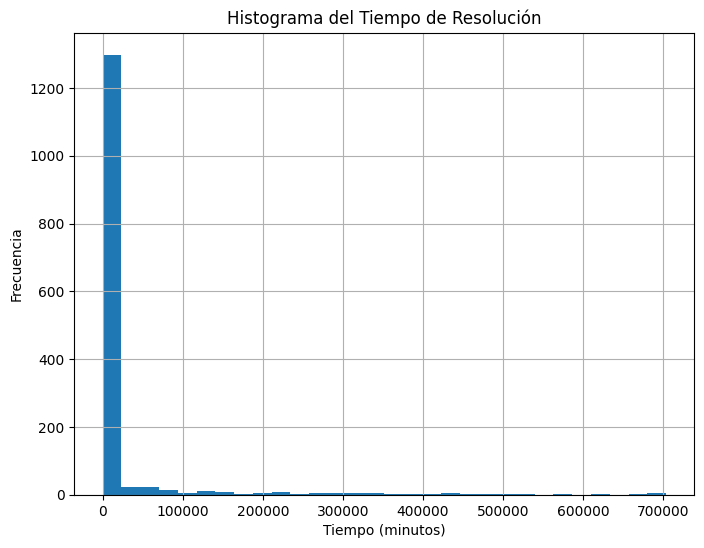

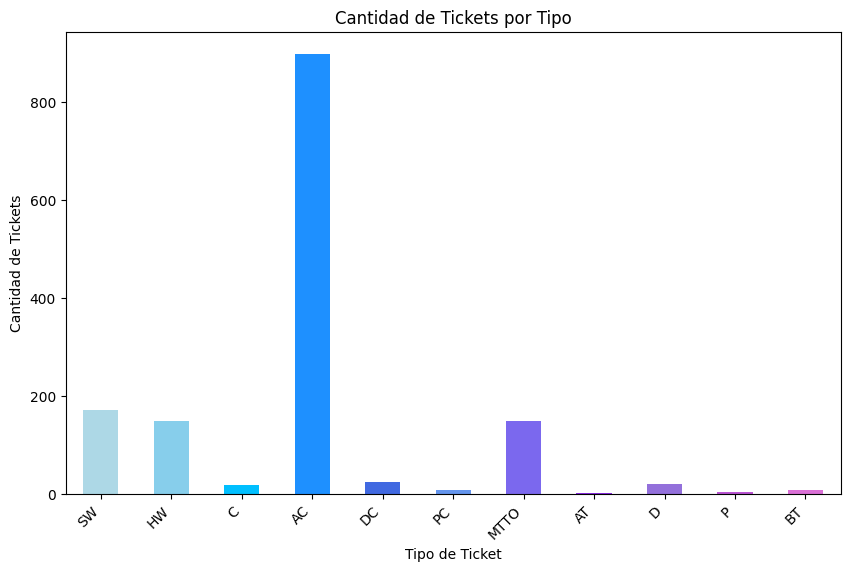

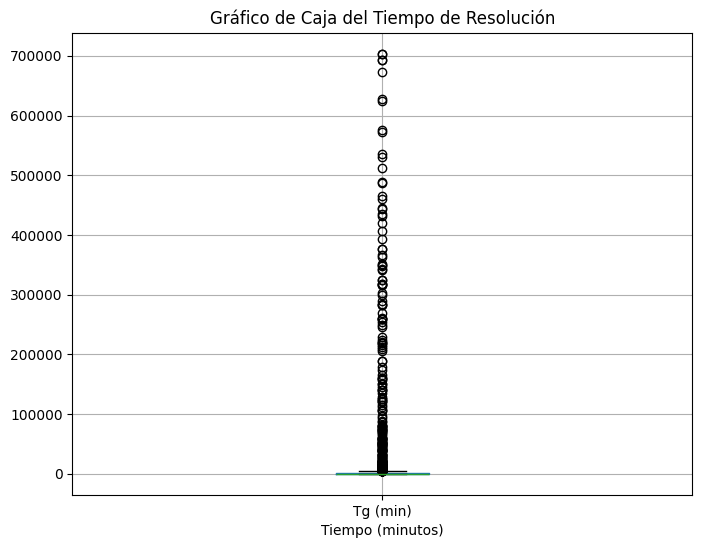

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('Tickets.csv')

# Crear los gráficos

## Histograma del tiempo de resolución
plt.figure(figsize=(8, 6))
data['Tg (min)'].hist(bins=30)
plt.title('Histograma del Tiempo de Resolución')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Frecuencia')
plt.show()

## Gráfico de barras de tipos de tickets
plt.figure(figsize=(10, 6))
data[['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']].sum().plot(kind='bar', color=['#ADD8E6', '#87CEEB', '#00BFFF', '#1E90FF', '#4169E1', '#6495ED', '#7B68EE', '#8A2BE2', '#9370DB', '#BA55D3', '#DA70D6'])
plt.title('Cantidad de Tickets por Tipo')
plt.xlabel('Tipo de Ticket')
plt.ylabel('Cantidad de Tickets')
plt.xticks(rotation=45, ha='right')
plt.show()

## Gráfico de caja del tiempo de resolución
plt.figure(figsize=(8, 6))  
data.boxplot(column=['Tg (min)'])
plt.title('Gráfico de Caja del Tiempo de Resolución')
plt.xlabel('Tiempo (minutos)')
plt.show()


Acá en estos graficos podemos ver una representación visual de lo que se explicaba ahotita. El primero muestra como se distribuyen los 1448 tikets en intervalos de tiempos de solución, y de esos vemos que 1200 entán bien por de bajpo de los 10000 minutos, por debajo de 6 dias de demora de solución. Y en el grafico de caja podemos ver la gran cantidad de ellos que están por ensima, son cerca de otros 200 tikets los que se situarían por esa zona. haciendo análisis de datos podemos llegar a otros factores, por ejemplo: el siguiente gráfico mostrará el tiempo promedio de cada tiket 

C:\Users\Amalia\AppData\Local\Temp\ipykernel_2896\1263450377.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_promedios, x='Tipo de Falla', y='Promedio Tiempo (min)', palette='viridis')


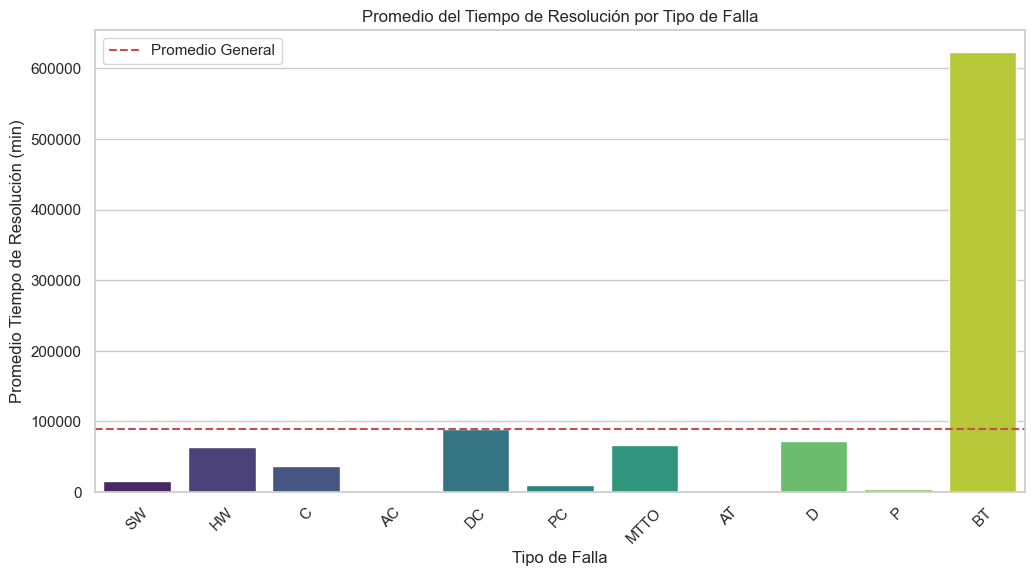

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Convertir la columna 'Tg (min)' a numérico, forzando errores a NaN
data['Tg (min)'] = pd.to_numeric(data['Tg (min)'], errors='coerce')

# Lista de tipos de fallas
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']

# Calcular promedios
promedios = {}
for tipo in tipos_falla:
    promedios[tipo] = data[data[tipo] == 1]['Tg (min)'].mean()

# Crear un DataFrame para los promedios
df_promedios = pd.DataFrame(list(promedios.items()), columns=['Tipo de Falla', 'Promedio Tiempo (min)'])

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_promedios, x='Tipo de Falla', y='Promedio Tiempo (min)', palette='viridis')
plt.title('Promedio del Tiempo de Resolución por Tipo de Falla')
plt.xlabel('Tipo de Falla')
plt.ylabel('Promedio Tiempo de Resolución (min)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.axhline(y=df_promedios['Promedio Tiempo (min)'].mean(), color='r', linestyle='--', label='Promedio General')  # Línea media
plt.legend()
plt.show()

Como podemos ver tenos una distribución acorde con los análisis anteriores. El análisis de los datos de falla muestra que la mayoría de los tickets se resuelven en menos de 6 días. Sin embargo,  las fallas por Corriente Alterna (AC) son particularmente interesantes. A pesar de tener un tiempo de resolución relativamente corto, las fallas AC representan un alto porcentaje de los tickets, con más de 800 casos en menos de dos años.  Es importante destacar que las fallas AC no son responsabilidad de Etecsa, sino que se deben a interrupciones en el suministro eléctrico.  
  
Aunque la mayoría de los tickets se resuelven rápidamente, el gráfico anteror revela una variable importante que afecta el tiempo de solución.  Las bajas temporales (BT), aunque no tan frecuentes, suelen demorarse un tiempo considerable en resolverse, lo que afecta significativamente el promedio de tiempo de solución.  
  
El objetivo de este estudio es desarrollar un modelo predictivo que permita determinar el tiempo de solución de cada nuevo ticket de falla, teniendo en cuenta la naturaleza específica de la falla. Este modelo debe ser preciso y considerar la importancia relativa de cada variable para lograr una predicción confiable.  
    
  Si bien la alta variabilidad y posibles outliers en los tiempos de resolución de los tickets  requieren un análisis más profundo, podemos comenzar a comprender mejor este comportamiento  utilizando herramientas de la matemática numérica. Un enfoque prometedor podría ser la aplicación de **Regresión lineal**,  la cual nos permite  identificar relaciones  entre las variables  y predecir los tiempos de resolución.  Este enfoque nos permitirá  extraer información significativa de los datos y  ayudarnos  a tomar mejores decisiones  para optimizar la gestión de  los tickets.   
  
Esta técnica matemática permite modelar la relación entre las variables independientes (en este caso los tipos de falla) y la variable dependiente (tiempo de solución).  La regresión lineal nos permitirá:
  
* **Identificar los factores que más influyen en el tiempo de solución:**  Analizando los coeficientes de la regresión, podremos determinar qué variables tienen un mayor impacto en el tiempo de solución.  
* **Predecir el tiempo de solución:**  Utilizando los coeficientes de la regresión, podremos construir un modelo que permita predecir el tiempo de solución de cada nuevo ticket de falla, teniendo en cuenta las variables específicas de cada caso.  
* **Optimizar la resolución de fallas:**  Al comprender la relación entre las variables y el tiempo de solución, podemos tomar medidas para optimizar el proceso de resolución de fallas, priorizando las fallas con mayor impacto en los servicios y  reduciendo el tiempo de respuesta para las fallas de mayor duración.  

Antes de ajustar un modelo de regresión lineal, es fundamental verificar que se cumplan ciertos supuestos, ondiciones o premisas que deben cumplirse para que el modelo sea válido y los resultados sean interpretables. Estos supuestos son fundamentales porque garantizan que las estimaciones de los parámetros del modelo (los coeficientes) sean precisas y que las inferencias estadísticas (como pruebas de hipótesis y intervalos de confianza) sean fiables. 

### Modelo re regresión lineal

      SW  HW  C  AC  DC  PC  MTTO  AT  D  P  BT  Tg (min)
0      1   0  0   0   0   0     0   0  0  0   0     14111
1      1   0  0   0   0   0     0   0  0  0   0     14552
2      1   0  0   0   0   0     0   0  0  0   0     26101
3      1   0  0   0   0   0     0   0  0  0   0     37930
4      0   1  0   0   0   0     0   0  0  0   0      4246
...   ..  .. ..  ..  ..  ..   ...  .. .. ..  ..       ...
1443   0   0  0   1   0   0     0   0  0  0   0       112
1444   0   0  0   1   0   0     0   0  0  0   0       938
1445   0   0  0   0   0   0     1   0  0  0   0    121984
1446   0   0  0   0   1   0     0   0  0  0   0      1379
1447   0   1  0   0   0   0     0   0  0  0   0      3917

[1448 rows x 12 columns]


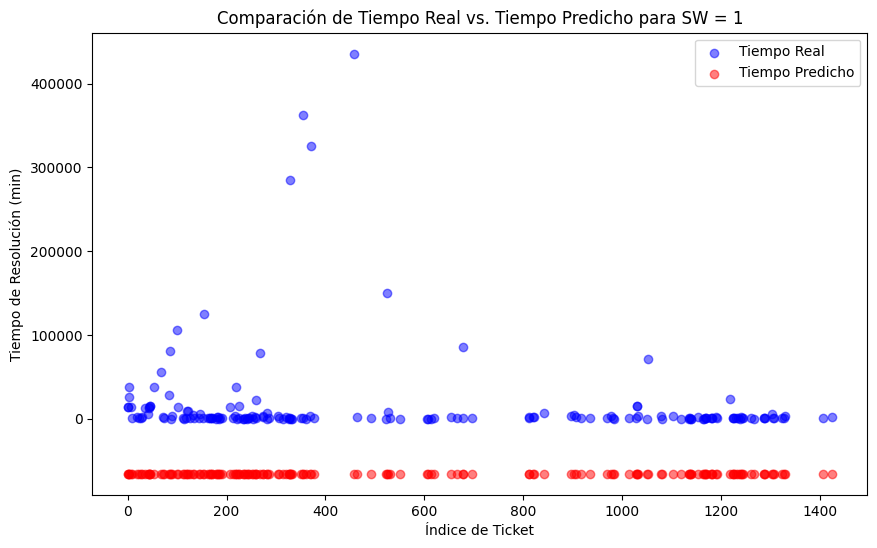

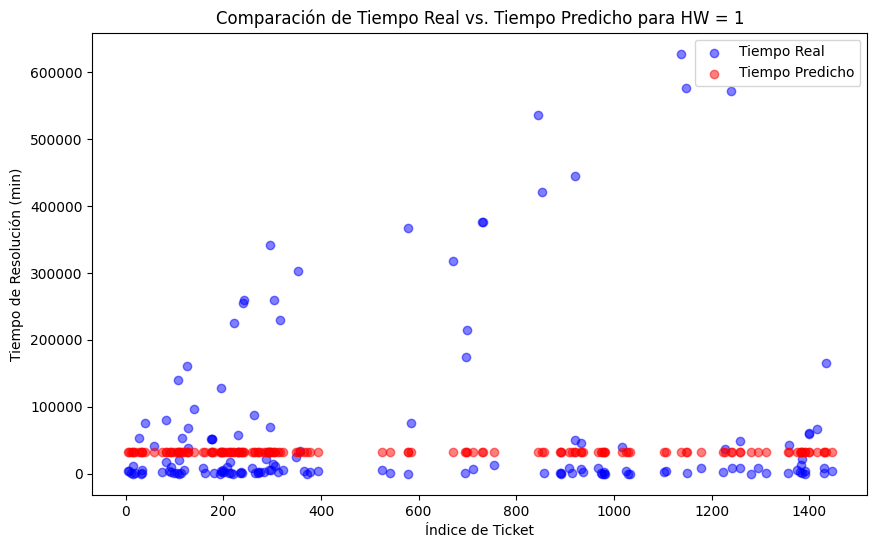

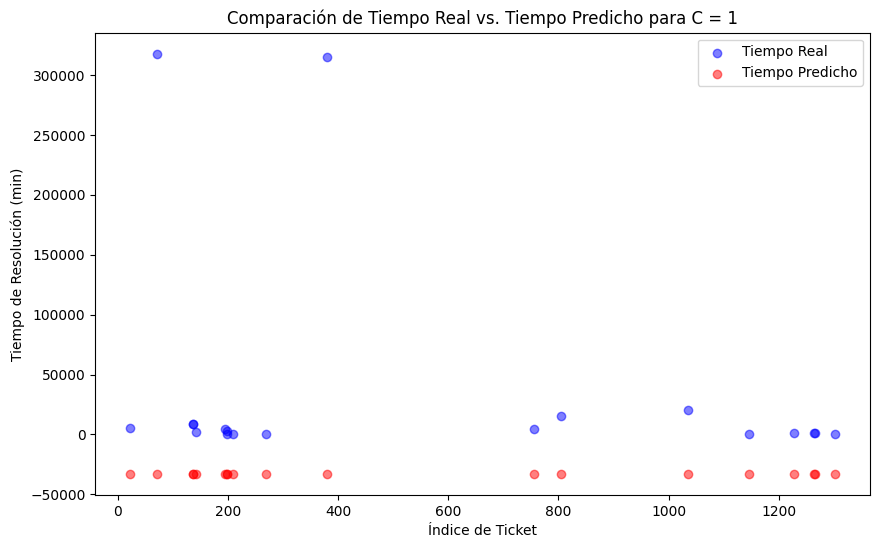

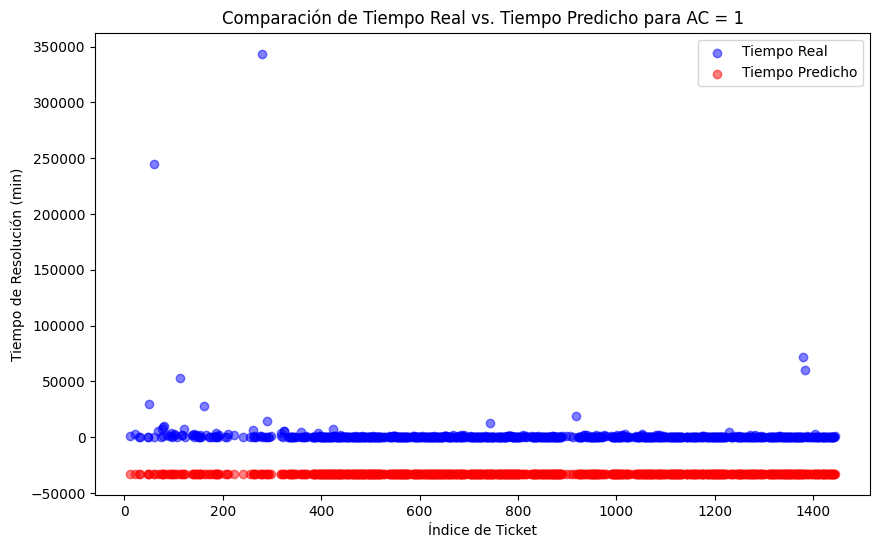

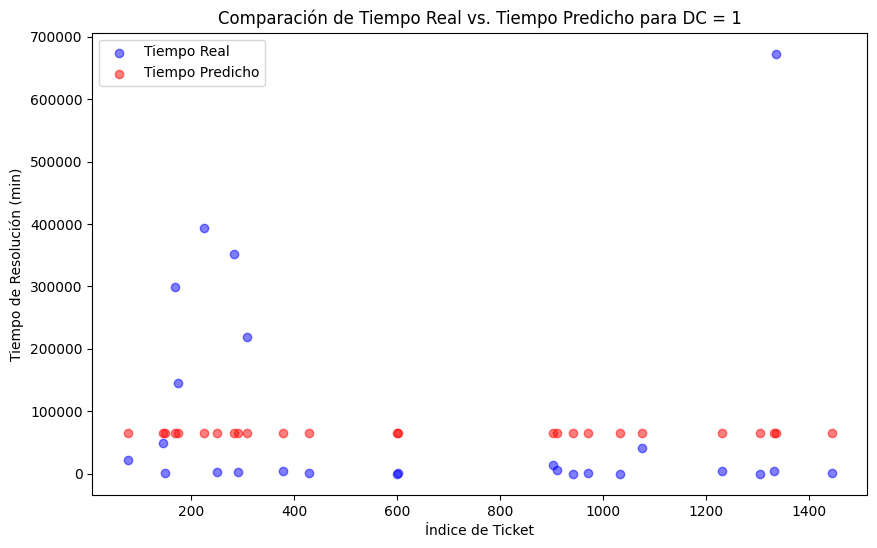

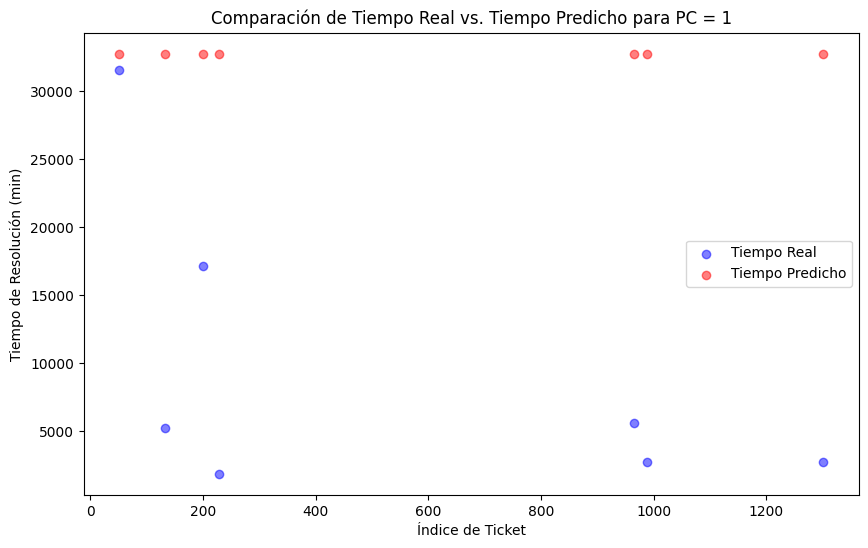

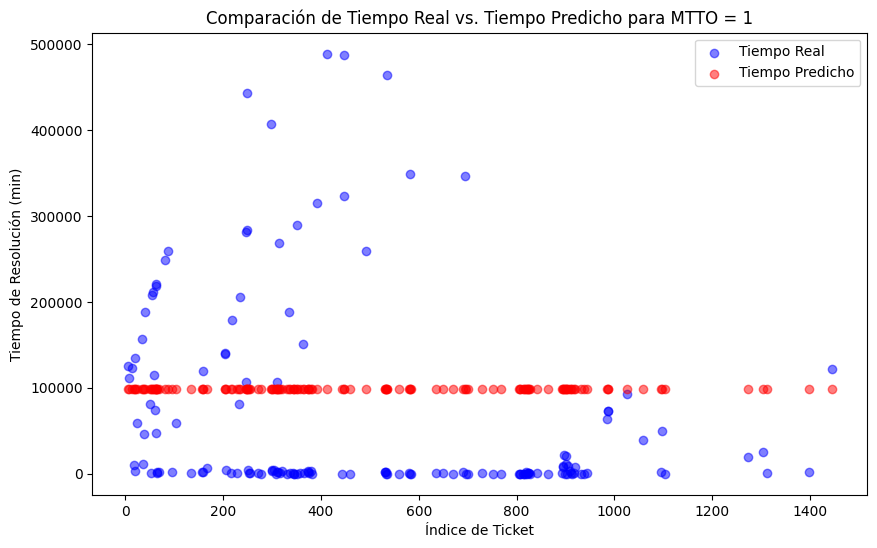

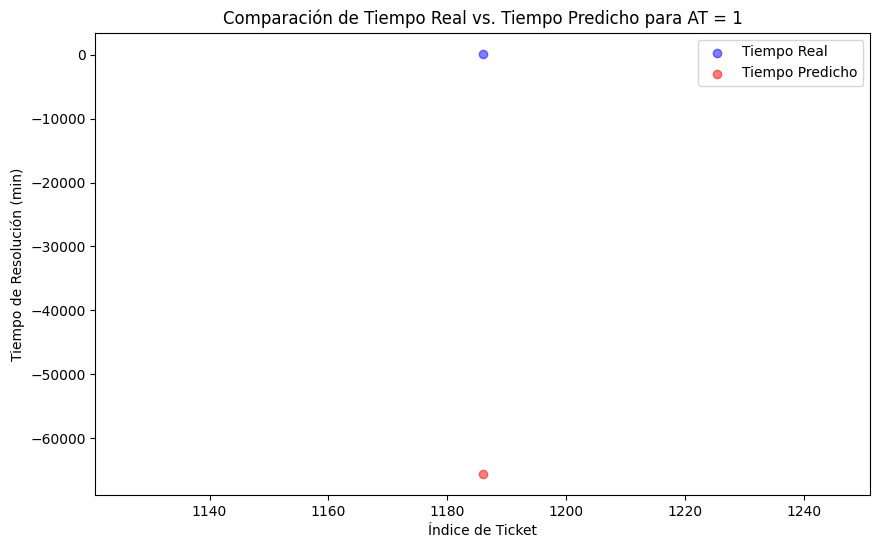

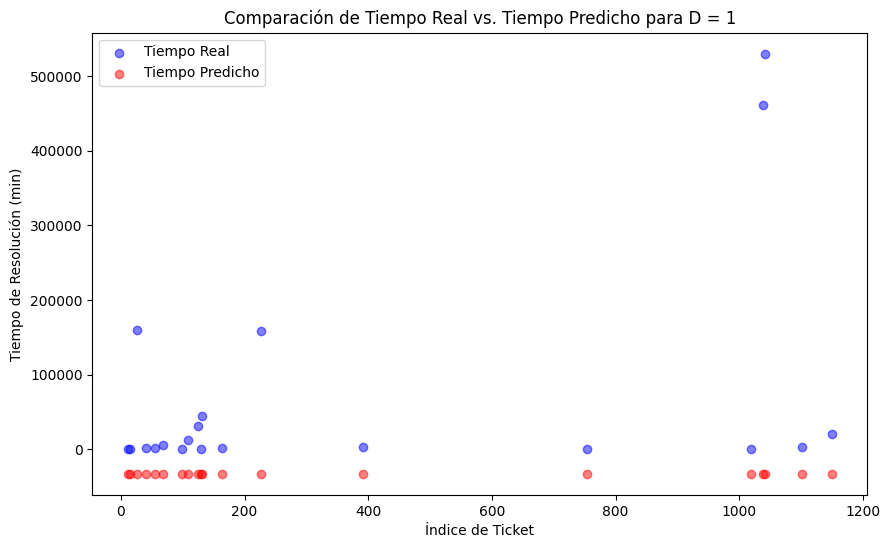

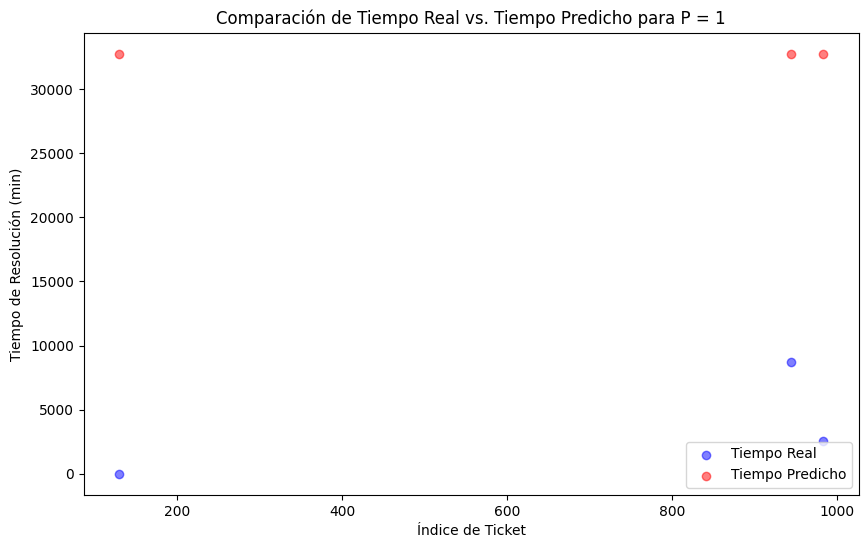

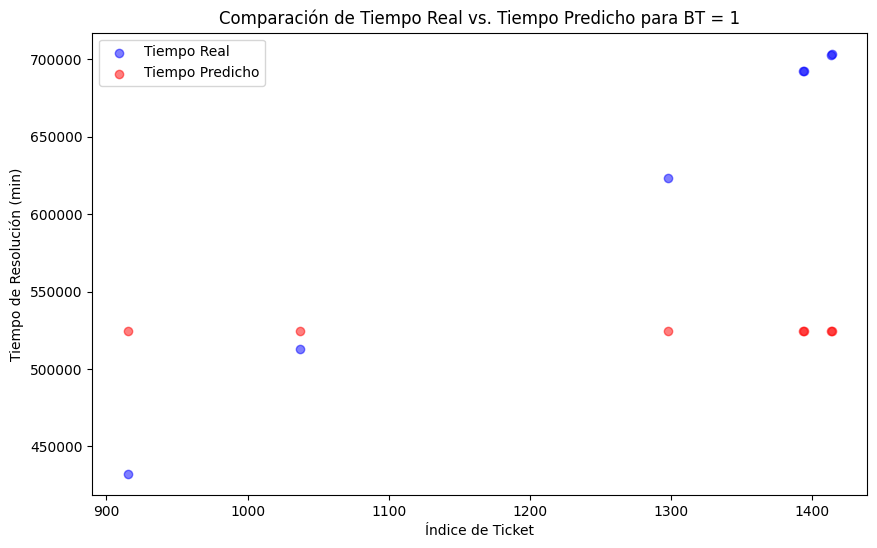

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Crear una lista con los nombres de las columnas de tipos de falla
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']
print(data[tipos_falla + ['Tg (min)']])  # Muestra las columnas de interés

# Creando la matriz
# Seleccionar las columnas para X (variables independientes) 
X_columns = tipos_falla
X = data[X_columns].values  # Convertir a un array de NumPy

# Agregar una columna de unos para el intercepto b_0
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Seleccionar la columna para Y (variable dependiente)
Y = data['Tg (min)'].values  # Convertir a un array de NumPy

# Calcular los coeficientes β
beta = np.linalg.inv(X.T @ X) @ (X.T @ Y)

# Calcular los valores predichos Y (Y_hat)
Y_hat = X @ beta

# Agregar la columna de predicciones al DataFrame
data['Tiempo_Predicho'] = Y_hat

# Crear gráficos para cada variable independiente
for col in X_columns:
    plt.figure(figsize=(10, 6))
    
    # Filtrar los datos cuando la variable independiente actual sea 1
    data_filtered = data[data[col] == 1]
    
    plt.scatter(data_filtered.index, data_filtered['Tg (min)'], label='Tiempo Real', color='blue', alpha=0.5)
    plt.scatter(data_filtered.index, data_filtered['Tiempo_Predicho'], label='Tiempo Predicho', color='red', alpha=0.5)
    plt.xlabel('Índice de Ticket')
    plt.ylabel('Tiempo de Resolución (min)')
    plt.title(f'Comparación de Tiempo Real vs. Tiempo Predicho para {col} = 1')
    plt.legend()
    plt.show()



Regresión Lineal Múltiple
La regresión lineal múltiple es una técnica estadística que permite modelar la relación entre una variable dependiente (Y) y múltiples variables independientes (X1, X2, ..., Xk). El objetivo es encontrar la ecuación lineal que mejor se ajuste a los datos y poder hacer predicciones sobre el valor de Y dado un conjunto de valores para las variables X. La ecuación de regresión lineal múltiple tiene la siguiente forma: Y=β0+β1X1+β2X2+...+βkXk+ϵY=β0​+β1​X1​+β2​X2​+...+βk​Xk​+ϵ Donde:

    Y es la variable dependiente
    X1, X2, ..., Xk son las variables independientes
    β0, β1, β2, ..., βk son los coeficientes de regresión
    ε es el término de error aleatorio

Los coeficientes β representan el cambio esperado en Y por cada unidad de cambio en la variable X correspondiente, manteniendo las demás variables constantes.
Supuestos del Modelo
Para que el modelo de regresión lineal múltiple sea válido, deben cumplirse los siguientes supuestos:

    Linealidad: La relación entre Y y las X debe ser lineal en los parámetros.
    Independencia: Los términos de error deben ser independientes entre sí.
    Homocedasticidad: La varianza de los términos de error debe ser constante.
    Normalidad: Los términos de error deben seguir una distribución normal.
    No multicolinealidad: Las variables independientes no deben estar altamente correlacionadas entre sí.

Estimación de los Parámetros
Los coeficientes β se estiman mediante el método de mínimos cuadrados ordinarios (MCO). Este método busca minimizar la suma de los cuadrados de los residuos (diferencia entre los valores observados y los predichos por el modelo). Las estimaciones de MCO tienen propiedades deseables como insesgamiento, consistencia y eficiencia bajo los supuestos del modelo.
Bondad de Ajuste
Para evaluar qué tan bien el modelo se ajusta a los datos, se utilizan medidas como el coeficiente de determinación (R^2). Este estadístico indica la proporción de la varianza en Y que es explicada por las variables X en el modelo. Un R^2 alto (cercano a 1) indica un buen ajuste, mientras que un R^2 bajo (cercano a 0) sugiere que el modelo no explica bien la variabilidad en Y.
Inferencia Estadística
